#Import all the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Load the data 

In [ ]:
train_data = pd.read_csv("/content/Training.csv")
match_2020 = pd.read_csv("/content/Matches IPL 2020.csv")
match_2008_2019 = pd.read_csv("/content/Matches IPL 2008-2019.csv")
IPL_players = pd.read_csv("/content/IPL 2020 Squads.csv", encoding = "unicode_escape")

In [ ]:
print(train_data.head())

print(train_data.shape)

                Id  Runs  Boundaries  Six  Fifty  Hundred  Duck  Batting_Points  Wickets  4W_Haul  5W_Haul  Maidens  Bowling_Points  Total Points
0   1_Bipul Sharma     0           0    0      0        0     0               0        1        0        0        0              25            25
1       1_DJ Hooda    16           1    1      0        0     0              19        1        0        0        0              25            44
2      1_KM Jadhav    31           5    1      0        0     0              38        0        0        0        0               0            38
3  1_Mandeep Singh    24           5    0      0        0     0              29        0        0        0        0               0            29
4   1_Yuvraj Singh    62          10    3      1        0     0              86        0        0        0        0               0            86
(15916, 14)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15916 entries, 0 to 15915
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              15916 non-null  object
 1   Runs            15916 non-null  int64 
 2   Boundaries      15916 non-null  int64 
 3   Six             15916 non-null  int64 
 4   Fifty           15916 non-null  int64 
 5   Hundred         15916 non-null  int64 
 6   Duck            15916 non-null  int64 
 7   Batting_Points  15916 non-null  int64 
 8   Wickets         15916 non-null  int64 
 9   4W_Haul         15916 non-null  int64 
 10  5W_Haul         15916 non-null  int64 
 11  Maidens         15916 non-null  int64 
 12  Bowling_Points  15916 non-null  int64 
 13  Total Points    15916 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.7+ MB


In [ ]:
train_data.describe()

,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
count,15916.000000,15916.000000,15916.00000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000
mean,14.029027,1.794546,0.51332,0.070872,0.003895,0.057741,17.364036,0.501508,0.007791,0.001257,0.015142,12.741267,30.105303
std,19.932138,2.857668,1.14761,0.256619,0.062294,0.233260,26.402587,0.860593,0.087924,0.035427,0.123146,22.079906,30.143498
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
75%,21.000000,3.000000,1.00000,0.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,25.000000,48.000000
max,175.000000,30.000000,17.00000,1.000000,1.000000,1.000000,255.000000,6.000000,1.000000,1.000000,2.000000,174.000000,305.000000


In [ ]:
#create a copy of the train data 

train = train_data.copy()

train[['Id','Player']] = train.Id.str.split("_",expand=True)

In [ ]:
train.head(10)

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,Player
0,1,0,0,0,0,0,0,0,1,0,0,0,25,25,Bipul Sharma
1,1,16,1,1,0,0,0,19,1,0,0,0,25,44,DJ Hooda
2,1,31,5,1,0,0,0,38,0,0,0,0,0,38,KM Jadhav
3,1,24,5,0,0,0,0,29,0,0,0,0,0,29,Mandeep Singh
4,1,62,10,3,1,0,0,86,0,0,0,0,0,86,Yuvraj Singh
5,1,11,1,1,0,0,0,14,1,0,0,0,25,39,STR Binny
6,1,6,1,1,0,0,0,9,1,0,0,0,25,34,TS Mills
7,1,30,3,0,0,0,0,33,0,0,0,0,0,33,TM Head
8,1,6,1,1,0,0,0,9,1,0,0,0,25,34,A Choudhary
9,1,1,0,0,0,0,0,1,0,0,0,0,0,1,Sachin Baby


In [ ]:
train.shape

(15916, 15)

#Separate the labels and target values

In [ ]:
x=np.array(train.iloc[:,1:-2])
y=np.array(train.iloc[:,-2])

In [ ]:
x

array([[ 0,  0,  0, ...,  0,  0, 25],
       [16,  1,  1, ...,  0,  0, 25],
       [31,  5,  1, ...,  0,  0,  0],
       ...,
       [15,  2,  1, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0, 50],
       [16,  2,  1, ...,  0,  0,  0]])

In [ ]:
y

array([25, 44, 38, ..., 19, 52, 20])

#Loading required libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

#Spliting data into train test

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

#Feature scaling

In [ ]:
sc = StandardScaler()
sc.fit(train_x)
train_x = sc.transform(train_x)
test_x = sc.transform(test_x)

#Train Linear Regression model

In [ ]:
lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test_x[0,:]

array([ 1.45140121,  0.41992401,  1.29997296, -0.27530373, -0.06215657,
       -0.25071898,  1.23536323, -0.58194357, -0.08761899, -0.03762661,
       -0.12277923, -0.57600271])

#Prediction on test data

In [ ]:
y_pred = lr.predict(test_x)

In [ ]:
y_pred

array([ 5.00000000e+01,  1.40000000e+01,  5.00000000e+00, ...,
        4.80000000e+01,  2.10000000e+01, -2.13162821e-14])

In [ ]:
test_y

array([50, 14,  5, ..., 48, 21,  0])

In [ ]:
lr.score(test_x,test_y)

1.0

#Model evaluation

In [ ]:
mse= mean_squared_error(y_pred,test_y)

In [ ]:
mse

4.747773232510691e-28

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

2.1789385563871898e-14

#Check the difference between the actual value and predicted value.

In [ ]:
df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

df1 = df.head(25)
df1.head()

,Actual,Predicted
0,50,5.000000e+01
1,14,1.400000e+01
2,5,5.000000e+00
3,50,5.000000e+01
4,0,-2.131628e-14


#Plot the comparison of Actual and Predicted values

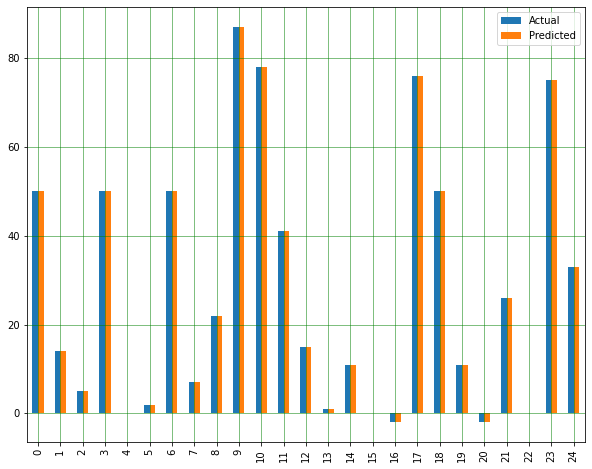

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

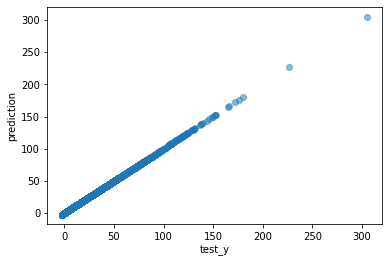

In [ ]:
# Results scene through scatter plot.
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel('test_y')
plt.ylabel('prediction')
plt.show()

#Load the preprocessed data

In [ ]:
data = pd.read_csv('/content/pivot.csv')
data.head()

,Player,Sum of Runs,Sum of Boundaries,Sum of 5W_Haul,Sum of Maidens,Sum of Six,Sum of Wickets,Sum of Fifty,Sum of Hundred,Sum of 4W_Haul,Sum of Duck
0,A Ashish Reddy,280,31,0,0,15,18,0,0,0,0
1,A Chandila,4,0,0,0,0,11,0,0,1,1
2,A Chopra,53,7,0,0,0,0,0,0,0,0
3,A Choudhary,25,2,0,2,1,5,0,0,0,0
4,A Dananjaya,4,0,0,0,0,0,0,0,0,0


#Add the batting and bowling points, and calculate the total points

In [ ]:
data['batting_points'] = data['Sum of Runs'] + data['Sum of Boundaries'] + 2 * data['Sum of Six'] + 8 * data['Sum of Fifty'] + 16 * data['Sum of Hundred'] - 2 * data['Sum of Duck']
data['bowling_points'] = 25 * data['Sum of Wickets'] + 8 * data['Sum of 4W_Haul'] + 16 * data['Sum of 5W_Haul'] + 8 * data['Sum of Maidens']
data['total'] = data['batting_points'] + data['bowling_points']

In [ ]:
data.head()

,Player,Sum of Runs,Sum of Boundaries,Sum of 5W_Haul,Sum of Maidens,Sum of Six,Sum of Wickets,Sum of Fifty,Sum of Hundred,Sum of 4W_Haul,Sum of Duck,batting_points,bowling_points,total
0,A Ashish Reddy,280,31,0,0,15,18,0,0,0,0,341,450,791
1,A Chandila,4,0,0,0,0,11,0,0,1,1,2,283,285
2,A Chopra,53,7,0,0,0,0,0,0,0,0,60,0,60
3,A Choudhary,25,2,0,2,1,5,0,0,0,0,29,141,170
4,A Dananjaya,4,0,0,0,0,0,0,0,0,0,4,0,4


#Separate the labels and target values

In [ ]:
X=np.array(data.iloc[:,1:-1])
Y=np.array(data.iloc[:,-1])

In [ ]:
X

array([[ 280,   31,    0, ...,    0,  341,  450],
       [   4,    0,    0, ...,    1,    2,  283],
       [  53,    7,    0, ...,    0,   60,    0],
       ...,
       [2765,  367,    0, ...,    4, 3526,  916],
       [ 192,   29,    0, ...,    2,  223,    0],
       [ 117,   13,    0, ...,    6,  122, 2623]])

In [ ]:
Y

array([ 791,  285,   60,  170,    4,  123,  183,  191, 1217, 4369,  214,
         18, 2707,   25,   25,  787, 1727,    0,   52,  495,   74,  214,
        282,    0,   35,  940,   50, 5731, 1765,  417,   -2,  153, 2723,
        388,  205,  574, 1542,  102, 3369,  105,  236,   56, 2236, 1124,
        552, 1004, 4728,  175,  343,    6,  200,   70,  525,   56,  484,
        165,  100,  410,   13, 2747,  594,  226, 1252, 4112,   46,  130,
       1203,  242,  337,   25, 3618,  251,  801,  181,   38,  315, 1451,
        434,  201, 3697,  150,  494,  560,  224,  650,   23, 2124,  237,
         46,   47,  558,  526,    0,  222,   18,  221,   48,   23, 1698,
        458, 6689, 2406,  966,  107,  309,   33,   14,  334, 1226,  204,
        571,  697,  437,  118,   53,   63,   19,  174,  559,   50, 2357,
       6145,   88,  373,  468,  997,  197, 5569,  137,  790, 1822,  112,
        101,  120,  651,  940,  836,    7,   62,  712,  101, 2220,   20,
       3759, 2328,   21, 1375,   14, 2643,  608, 10

#Spliting data into train test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
data.isnull().sum()

Player               0
Sum of Runs          0
Sum of Boundaries    0
Sum of 5W_Haul       0
Sum of Maidens       0
Sum of Six           0
Sum of Wickets       0
Sum of Fifty         0
Sum of Hundred       0
Sum of 4W_Haul       0
Sum of Duck          0
batting_points       0
bowling_points       0
total                0
dtype: int64

#Feature scaling

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

#Train Linear Regression model

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test[0,:]

array([-0.43306072, -0.42265449, -0.18768782, -0.36561982, -0.41608818,
       -0.32601439, -0.35227349, -0.20556228, -0.34310226, -0.7060343 ,
       -0.42770048, -0.32895897])

#Prediction on test data

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([ 1.77000000e+02,  6.30000000e+01,  1.20300000e+03,  9.83000000e+02,
        2.61000000e+02,  3.09000000e+02, -2.00000000e+00,  2.00000000e+00,
        7.84000000e+02,  5.00000000e+01,  4.58300000e+03,  2.23000000e+02,
        2.01000000e+02,  1.02000000e+02,  1.07000000e+02,  3.97000000e+02,
       -2.00000000e+00,  1.13686838e-13,  1.42200000e+03,  2.58200000e+03,
        7.50000000e+01,  1.13686838e-13,  3.70000000e+01,  2.30000000e+01,
        1.66400000e+03,  1.82100000e+03,  9.66000000e+02,  5.01900000e+03,
        3.15000000e+02,  2.03600000e+03,  1.44000000e+02,  2.14000000e+02,
        2.15900000e+03,  7.84000000e+02,  3.50000000e+02,  1.00000000e+01,
        1.59000000e+02,  3.29000000e+02,  5.60000000e+01,  4.80000000e+01,
        1.31700000e+03,  2.42800000e+03,  2.06000000e+02,  4.49000000e+02,
        3.50000000e+01,  2.90000000e+01,  1.79000000e+02,  1.46000000e+02,
        1.82000000e+02,  7.93000000e+02,  7.87000000e+02,  7.50000000e+01,
        2.50000000e+01,  

In [ ]:
y_test

array([ 177,   63, 1203,  983,  261,  309,   -2,    2,  784,   50, 4583,
        223,  201,  102,  107,  397,   -2,    0, 1422, 2582,   75,    0,
         37,   23, 1664, 1821,  966, 5019,  315, 2036,  144,  214, 2159,
        784,  350,   10,  159,  329,   56,   48, 1317, 2428,  206,  449,
         35,   29,  179,  146,  182,  793,  787,   75,   25,    3,   78,
          0,  955, 1631,   14,  524, 3166, 1004,  153,   25,  125,  752,
        230,  440,   25,  558, 1341, 4728,  101, 1767,  214,  559,   47,
       1943, 2102,   25,  251,  727, 1616,   23, 1029, 2560,   82, 1226,
        390,   84,  839,  650,  101,  414,    2,  185,   34,  359,  299,
       1250,  158,  195,  334,    5,    7, 2205,  285,  641,  886, 2707,
        175,   20])

In [ ]:
lr.score(x_test,y_test)

1.0

#Model evaluation

In [ ]:
mse= mean_squared_error(y_pred,y_test)

In [ ]:
mse

2.381837031681709e-25

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

4.880406777802142e-13

#Check the difference between the actual value and predicted value.



In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df3 = df.head(25)
df3.head()

,Actual,Predicted
0,50,5.000000e+01
1,14,1.400000e+01
2,5,5.000000e+00
3,50,5.000000e+01
4,0,-2.131628e-14


#Plot the comparison of Actual and Predicted values

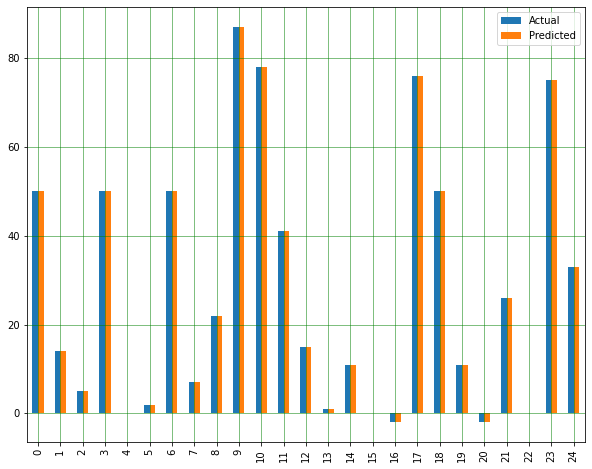

In [ ]:
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Ridge Regression using training data

In [ ]:
#Import libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Load and fit the model

In [ ]:

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-4.497372830112353e-27


#Prediction on test data

In [ ]:
prediction=ridge_regressor.predict(test_x)

#Plot the difference

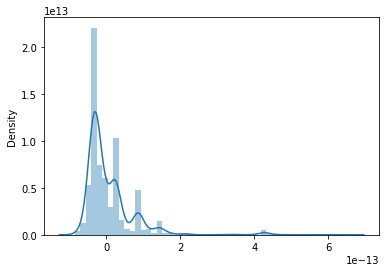

In [ ]:
import seaborn as sns
sns.distplot(test_y - prediction)

#Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(test_y, prediction))
print('MSE:', mean_squared_error(test_y, prediction))
print('RMSE:', np.sqrt(mean_squared_error(test_y, prediction)))

MAE: 4.3877799216441865e-14
MSE: 4.975551863736818e-27
RMSE: 7.05375918481544e-14


#Lasso Regression using training data

In [ ]:
#Import libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Load and fit the model

In [ ]:

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(lasso_regressor.best_params_)
print("")
print(lasso_regressor.best_score_)

{'alpha': 0.001}

-5.378074149043106e-06


#Visuallization

In [ ]:
# Plotly to create interactive graph
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
data.columns

Index(['Player', 'Sum of Runs', 'Sum of Boundaries', 'Sum of 5W_Haul', 'Sum of Maidens', 'Sum of Six', 'Sum of Wickets', 'Sum of Fifty', 'Sum of Hundred', 'Sum of 4W_Haul', 'Sum of Duck', 'batting_points', 'bowling_points', 'total'], dtype='object')

#Players with maximum runs

In [ ]:
#Players with maximum runs
runs = data.groupby("Player", sort=False)["Sum of Runs"].sum()
runs = runs.sort_values(ascending = False).head(15)

In [ ]:
fig = px.bar(data, x = runs.index, y = runs, color = runs.index, title = 'Players with maximum runs')
fig.show(renderer = "colab")

In [ ]:
wickets = data.groupby("Player", sort=False)["Sum of Wickets"].sum()
wickets = wickets.sort_values(ascending = False).head(15)

In [ ]:
fig = px.bar(data, x = wickets.index, y = wickets, color = wickets.index, title = 'Players with maximum Wickets')
fig.show(renderer = "colab")

#Highest scores of IPL

In [ ]:
high_scores = data.groupby(['Player','batting_points','bowling_points'])['total'].sum().reset_index() 
high_scores = high_scores[high_scores['total']>=2000]
hss = high_scores.nlargest(10,'total')

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Player','Batting Points','Bowling Points', 'Total Score']),
                 cells=dict(values= [hss['Player'], hss['batting_points'], hss['bowling_points'], hss['total']], height = 30))
                     ])
fig.show(renderer="colab")

#Drop unwanted columns from 2020 data

In [ ]:
match20 = match_2020.drop(['umpire1', 'umpire2', 'umpire3'], axis=1)
match20.head()

,match_id,city,date,team1,team2,venue
0,1216492,Abu Dhabi,9/19/2020,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi"
1,1216493,Dubai (DSC),9/20/2020,DC,KXIP,Dubai International Cricket Stadium
2,1216534,Dubai (DSC),9/21/2020,SRH,RCB,Dubai International Cricket Stadium
3,1216496,Sharjah,9/22/2020,RR,CSK,Sharjah Cricket Stadium
4,1216508,Abu Dhabi,9/23/2020,KKR,MI,"Sheikh Zayed Stadium, Abu Dhabi"


#Unique teams

In [ ]:
match20.team1.unique()

array(['MI', 'DC', 'SRH', 'RR', 'KKR', 'KXIP', 'CSK', 'RCB'], dtype=object)

#Unique cities 

In [ ]:
match20.city.unique()

array(['Abu Dhabi', 'Dubai (DSC)', 'Sharjah'], dtype=object)

#Cities with Maximum matches in 2020

In [ ]:
city = match20.city.value_counts()
fig = px.bar(match20, x= city.index, y = city, color = city, title='Cities with Maximum matches in 2020')
fig.show(renderer="colab")

we can see that most of 2020's matches were played in Dubai(26 matches) 

#Drop unwanted columns from 2008 - 2019 data

In [ ]:
match0819 = match_2008_2019.drop(['result', 'dl_applied','umpire1', 'umpire2', 'umpire3'], axis=1)
match0819.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens


#Unique cities

In [ ]:
match0819.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Rajkot', 'Kanpur', 'Mohali',
       'Bengaluru'], dtype=object)

#Cities with Maximum matches from 2008 - 2019

In [ ]:
city = match0819.city.value_counts()[:15]
fig = px.bar(match0819, x= city.index, y = city, color = city, title = 'Cities with Maximum matches from 2008 - 2019')
fig.show(renderer = "colab")

Here we can see that the maximum matches played in Mumbai(101 matches)

#Players with most Man of the matches

In [ ]:
player_of_match = match0819.player_of_match.value_counts()[:15]
fig = px.bar(match0819, x= player_of_match, y = player_of_match.index, orientation = 'h', title = 'Players with most Man of the matches')
fig.show(renderer = "colab")

Chris Gayle has the most man the match awards.

#Unique teams

In [ ]:
match0819.team1.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

#Replace column names

In [ ]:
x=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals']

y = ['KKR','CSK','RR','MI','SRH','KXIP','RCB','DC','KTK','PW','SRH','RPS','GL','RPS','DC']

match0819.replace(x,y,inplace = True)
match0819.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,60,2008,Bangalore,18-04-2008,KKR,RCB,RCB,field,KKR,140,0,BB McCullum,M Chinnaswamy Stadium
1,61,2008,Chandigarh,19-04-2008,CSK,KXIP,CSK,bat,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
2,62,2008,Delhi,19-04-2008,RR,DC,RR,bat,DC,0,9,MF Maharoof,Feroz Shah Kotla
3,63,2008,Mumbai,20-04-2008,MI,RCB,MI,bat,RCB,0,5,MV Boucher,Wankhede Stadium
4,64,2008,Kolkata,20-04-2008,SRH,KKR,SRH,bat,KKR,0,5,DJ Hussey,Eden Gardens


In [ ]:
match0819.team1.unique()

array(['KKR', 'CSK', 'RR', 'MI', 'SRH', 'KXIP', 'RCB', 'DC', 'KTK', 'PW',
       'RPS', 'GL'], dtype=object)

#Check the shape of the data

In [ ]:
match0819.shape, match20.shape

((756, 13), (60, 6))

## **matches played in every season** 

In [ ]:
fig2 = px.histogram(match0819, x='season', color = 'season', title='Histogram Chart')
fig2.show(renderer="colab")

The year 2013 has the most matches, possibly due to super overs.

## **Matches Played Vs Wins**

Now let’s have a look at the number of matches played by each team and the number matches won by them:

In [ ]:
matches_played = pd.concat([match0819['team1'], match0819['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Team', 'Total Matches']
matches_played['wins'] = match0819['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
totm = matches_played.reset_index().head(10)

fig = go.Figure(data=[go.Table(header=dict(values=['Team','Total Matches','Wins']),
                 cells=dict(values=[totm['Team'], totm['Total Matches'], totm['wins']], height = 30))
                     ])
fig.show(renderer="colab")

So MI, SRH and RCB are the top three teams with the highest winning percentage. Let’s look at the winning percentage of these three teams:

In [ ]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(3)

Team
MI     58.3
SRH    54.6
RCB    51.1
dtype: float64

#The venues where the most number of matches have been played

In [ ]:
venue_matches = match0819.groupby('venue').count()[['match_id']].sort_values(by = 'match_id',ascending = False).head()
ser = pd.Series(venue_matches['match_id']) 
venue_matches = match0819.groupby('venue').count()[['match_id']].reset_index()

fig3 = go.Figure(go.Scatter(x = venue_matches['match_id'], y = venue_matches['venue'], mode = 'lines+markers'),
                 layout = {"title": "Stadiums Vs. Matches", "xaxis": {"title": "Matches Played", }, "yaxis": {"title": "Stadiums"}, "height":650})
fig3.show(renderer = 'colab')

Eden Gardens, Wankhede are stadiums with most matches